# Sensors analysis

Nutpy allows to include a model of the instrument which includes the number of detectors, their distribution on the instrument FOV and their individual FOV. Using this model, nutpy computes for each detector the same quantities as in the global visibility analysis. Furthermore, nutpy will compute how many detectors would be reached if a signal was emitted from each of the sky points.

Due to the complexity added by the instrument model, this analysis must be performed numerically.

As in the previous examples, we create a Nut instance and carry out the numerical analysis. In this case, we provide extra arguments to define the layout of the instrument detectors and their individual FOV. The basic configuration provides a rectangular layout, defined by the number of detectors in the horizontal direction ($N_x$) and vertical direction ($N_y$). 

Finally, as the sensor analysis is very time consuming, it is deactivated by default. To indicate nutpy that it must perform such an analysis, we must include the argument `detailed=True`. Note that as the detectors are considerably smaller that the instrument FOV, the required $dT$ for accurate results may be lower than in the global visibility analysis. Additionally, if you want to save the intermediate information of each detector, you can include the argument `dense=True`. Beware that this consumes much memory and could crash your computer.

In [15]:
from nutpy.mission import Nut

In [16]:
alpha = 45  # [deg]
beta = 50  # [deg]
Tspin = 10  # [min]
Tprec = 93  # [min]

delta_instrument = 7.5  # [deg]

Tsim = 6*3600  # [s]

dT = 0.2  # [s]

nside = 32

delta_detector = 0.25  # [deg]
Nx = 20
Ny = 20
layout = "rectangular"

detailed = True
dense = True

SSP = [alpha, beta, Tspin, Tprec]

LB = Nut(SSP=SSP,
         delta_instrument=delta_instrument,
         dT=dT,
         Tsim=Tsim,
         nside=nside,
         delta_detector=delta_detector,
         Nx=Nx,
         Ny=Ny,
         layout=layout,
         detailed=detailed,
         dense=dense)

It's possible to plot the detectors layout on the instrument FOV to check the configuration.

(<Figure size 1000x1000 with 1 Axes>, <AxesSubplot:>)

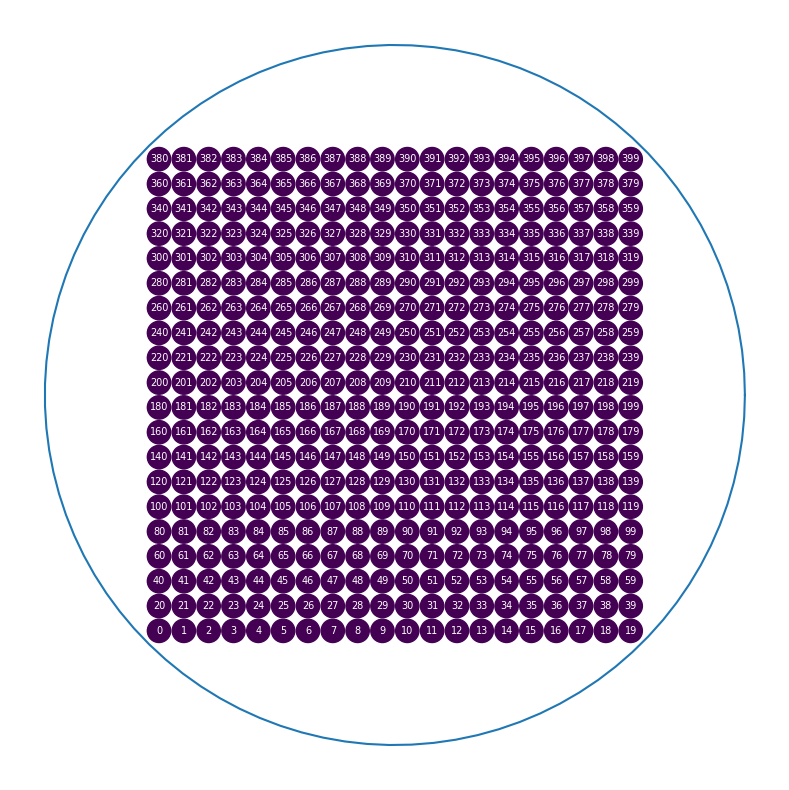

In [17]:
LB.plot_focal_plane()

In [18]:
LB.numerical_analysis()

C:\usr\repositories\nutpy\src\nutpy\mission.py:178: UserWarning: dT is too large for the analysis, results may not be accurate
  "dT is too large for the analysis, results may not be accurate"


  0%|          | 0/12288 [00:00<?, ?it/s]

0

After the analysis, the percentage of viewed sensors (PVS) can be plotted as any of the other quantities:

mollweide


(<Figure size 640x480 with 2 Axes>,
 array([32.  , 35.25, 33.5 , ..., 34.25, 33.  , 29.  ]))

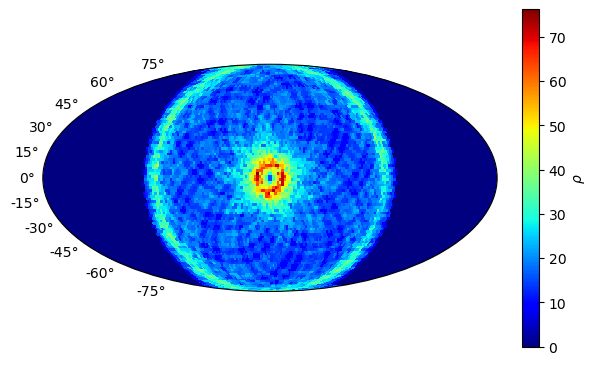

In [21]:
fig_pvs, data_pvs = LB.numerical_map('PVS')

If you want to plot the results for a single detector, you must provide its id, which is plotted in layout figure above

mollweide


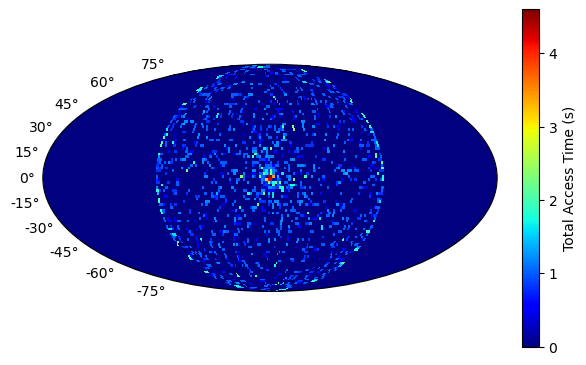

In [25]:
fig_det, data_det = LB.numerical_map(quantity='TAT', sensor_id=20)

The results are stored in a dataframe and can be retrieved from the Nut object. The second column indicates the id of the sky point (pixel) following HEALPix order, and the second column is the id of the sensor.

In [27]:
LB.numerical_results_detailed_df.head(10)

pixel_id  sensor_id  TAT  MAT  MAX  NOA  SGA
0         0          0  0.0  0.0  0.0    0  0.0
1         0          1  1.0  1.0  1.0    1  1.0
2         0          2  0.0  0.0  0.0    0  0.0
3         0          3  0.0  0.0  0.0    0  0.0
4         0          4  1.0  1.0  1.0    1  1.0
5         0          5  0.0  0.0  0.0    0  0.0
6         0          6  0.0  0.0  0.0    0  0.0
7         0          7  1.0  1.0  1.0    1  1.0
8         0          8  0.0  0.0  0.0    0  0.0
9         0          9  0.0  0.0  0.0    0  0.0

Other possible layouts are "circular" and "custome". The latter reads the position of each detectors from a txt file.

In [22]:
LB_circ = Nut(SSP=SSP,
              delta_instrument=delta_instrument,
              dT=dT,
              Tsim=Tsim,
              nside=nside,
              delta_detector=delta_detector,
              Nd=200,
              layout="circular",
              detailed=detailed,
              dense=dense)

LB_cust = Nut(SSP=SSP,
              delta_instrument=delta_instrument,
              dT=dT,
              Tsim=Tsim,
              nside=nside,
              delta_detector=delta_detector,
              layout="custome",
              detailed=detailed,
              dense=dense)

(<Figure size 1000x1000 with 1 Axes>, <AxesSubplot:>)

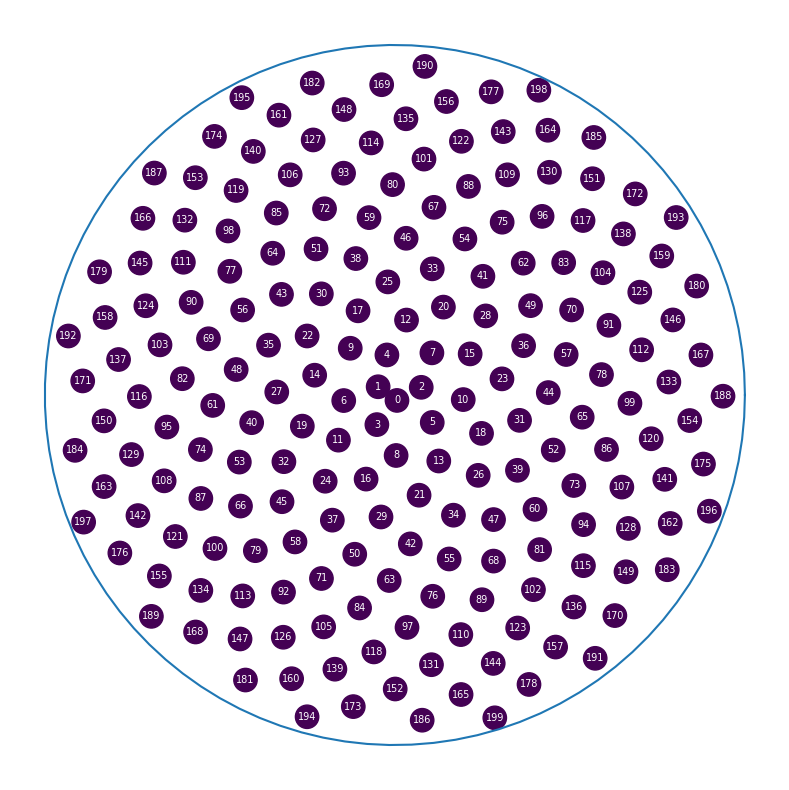

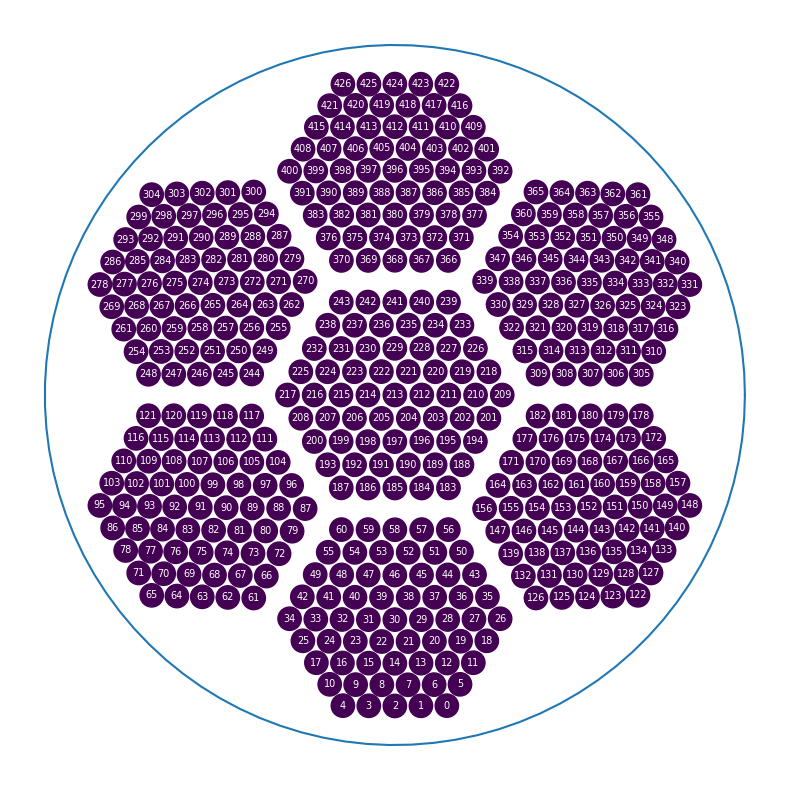

In [23]:
LB_circ.plot_focal_plane()
LB_cust.plot_focal_plane()